<a href="https://colab.research.google.com/github/C1PO/Machine_learning/blob/main/cognition%26computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# carica il dataset CIFAR-10
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train = x_train / 255.
x_test = x_test / 255.
x_val = x_val / 255.


170498071/170498071 [==============================] - 13s 0us/step


In [3]:
from keras.utils import to_categorical, plot_model

# converti le etichette di training in formato one-hot encoding
y_train = to_categorical(y_train, num_classes=10)

# converti le etichette di test in formato one-hot encoding
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

#IL RESHAPE QUA NON VIENE FATTO PERO LA SHAPE SEMBRA VADA BENE LO STESSO (?)

In [35]:
x_train.shape

(40000, 32, 32, 3)

In [4]:
print("The number of samples of the training set is", x_train.shape[0])
print("The number of samples of the test set is", x_test.shape[0])

The number of samples of the training set is 40000
The number of samples of the test set is 10000


In [83]:
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

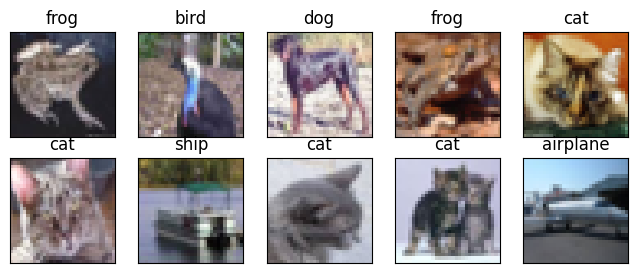

In [6]:
# plotting the first 10 images of the training set
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(labels[np.argmax(y_train[i])])
plt.show()

In [7]:
print(x_train.shape)
print(y_train.shape)

(40000, 32, 32, 3)
(40000, 10)


## Define the model

In [8]:
from os import name
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, AveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

weight_decay = 1e-4

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], name='conv1'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', name='conv3'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', name='conv5'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', name='conv6'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', name='dense1'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax', name='dense2'))


In [9]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [10]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

datagen.fit(x_train)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0000001)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [13]:
#plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=30, validation_data=(x_val, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/10
625/625 [==============================] - 65s 72ms/step - loss: 1.6602 - accuracy: 0.4119 - val_loss: 1.3337 - val_accuracy: 0.5199 - lr: 0.0010
Epoch 2/10
625/625 [==============================] - 38s 61ms/step - loss: 1.3144 - accuracy: 0.5294 - val_loss: 1.1429 - val_accuracy: 0.5875 - lr: 0.0010
Epoch 3/10
625/625 [==============================] - 40s 64ms/step - loss: 1.1700 - accuracy: 0.5795 - val_loss: 1.1277 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 4/10
625/625 [==============================] - 34s 55ms/step - loss: 1.0835 - accuracy: 0.6166 - val_loss: 1.0119 - val_accuracy: 0.6382 - lr: 0.0010
Epoch 5/10
625/625 [==============================] - 27s 43ms/step - loss: 1.0220 - accuracy: 0.6410 - val_loss: 1.0712 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 6/10
625/625 [==============================] - 27s 43ms/step - loss: 0.9812 - accuracy: 0.6535 - val_loss: 0.8812 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 7/10
625/625 [==============================] - 28s 

In [15]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.8079 - accuracy: 0.7234 - 954ms/epoch - 3ms/step


In [47]:
def plot_accuracy(history):
  plt.figure(figsize=(8,5))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')
  plt.show()

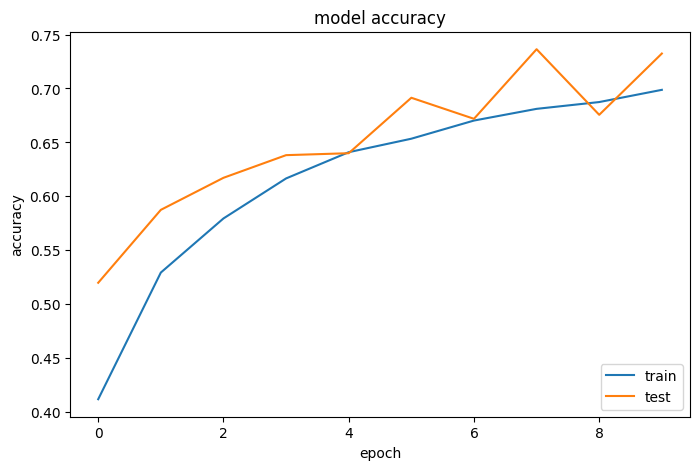

In [48]:
plot_accuracy(history)

In [50]:
def plot_errors(history):
  plt.figure(figsize=(8,5))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

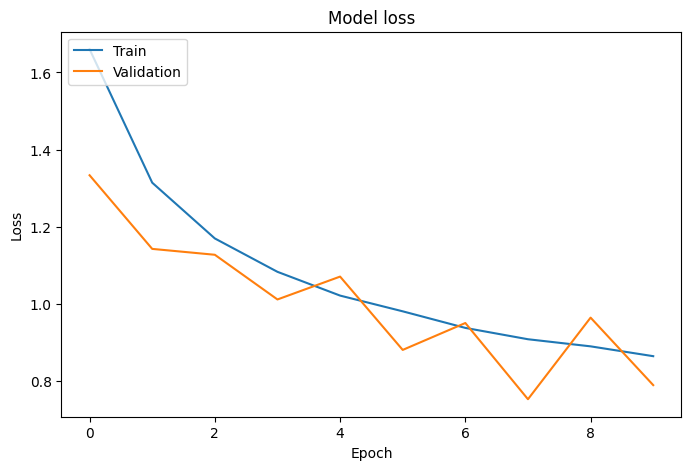

In [51]:
plot_errors(history)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import plotly.figure_factory as ff

y_pred = model.predict(x_test)

# converte le etichette di classe dal formato one-hot encoding a formato interi
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

# calcola l'accuratezza e la matrice di confusione
cm = confusion_matrix(y_test_int, y_pred_int)

fig = ff.create_annotated_heatmap(z=np.array(cm), colorscale='Blues')
fig.update_layout(title='Confusion Matrix')
fig.show()

313/313 [==============================] - 1s 2ms/step


## Linear read out

In [22]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [26]:
conv5_output = get_hidden_representation('conv5')
conv6_output = get_hidden_representation('conv6')
dense1_output = get_hidden_representation('dense1')

1250/1250 [==============================] - 3s 2ms/step


In [32]:
conv5_output.shape

(40000, 8, 8, 32)

In [33]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(8, 8, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history_conv5 = linear_model.fit(conv5_output, y_train,
                batch_size=64,
                epochs=10,
                validation_split=0.2)
#se metto validatio_data=(x_val, y_val) --> mi da errore. perchè?

Epoch 1/10
500/500 [==============================] - 4s 6ms/step - loss: 1.7948 - accuracy: 0.6104 - val_loss: 1.5387 - val_accuracy: 0.6494
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 1.3947 - accuracy: 0.6562 - val_loss: 1.4382 - val_accuracy: 0.6429
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 1.3595 - accuracy: 0.6643 - val_loss: 1.7046 - val_accuracy: 0.6194
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 1.2865 - accuracy: 0.6770 - val_loss: 1.3989 - val_accuracy: 0.6478
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 1.2978 - accuracy: 0.6746 - val_loss: 1.5304 - val_accuracy: 0.6516
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 1.2564 - accuracy: 0.6828 - val_loss: 1.4211 - val_accuracy: 0.6550
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 1.2407 - accuracy: 0.6861 - val_loss: 1.4776 - val_accuracy: 0.6538
Epoch 

In [56]:
linear_model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(8, 8, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_conv6 = linear_model2.fit(conv6_output, y_train,
                batch_size=64,
                epochs=10,
                validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 3s 4ms/step - loss: 1.2003 - accuracy: 0.6565 - val_loss: 1.0312 - val_accuracy: 0.6935
Epoch 2/10
500/500 [==============================] - 2s 3ms/step - loss: 0.8958 - accuracy: 0.7191 - val_loss: 0.9427 - val_accuracy: 0.7099
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.8249 - accuracy: 0.7402 - val_loss: 1.0113 - val_accuracy: 0.7050
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.7911 - accuracy: 0.7493 - val_loss: 0.9717 - val_accuracy: 0.7166
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.7796 - accuracy: 0.7563 - val_loss: 0.9759 - val_accuracy: 0.7186
Epoch 6/10
500/500 [==============================] - 2s 3ms/step - loss: 0.7608 - accuracy: 0.7593 - val_loss: 1.0126 - val_accuracy: 0.7156
Epoch 7/10
500/500 [==============================] - 3s 6ms/step - loss: 0.7326 - accuracy: 0.7655 - val_loss: 0.9741 - val_accuracy: 0.7188
Epoch 

In [57]:
linear_model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(1024,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_dense1 = linear_model3.fit(dense1_output, y_train,
                batch_size=64,
                epochs=10,
                validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 61s 3ms/step - loss: 0.7628 - accuracy: 0.7452 - val_loss: 0.6096 - val_accuracy: 0.7881
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5766 - accuracy: 0.8008 - val_loss: 0.5823 - val_accuracy: 0.7935
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5415 - accuracy: 0.8103 - val_loss: 0.5685 - val_accuracy: 0.7972
Epoch 4/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5198 - accuracy: 0.8181 - val_loss: 0.5625 - val_accuracy: 0.8009
Epoch 5/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5050 - accuracy: 0.8229 - val_loss: 0.5608 - val_accuracy: 0.7987
Epoch 6/10
500/500 [==============================] - 2s 5ms/step - loss: 0.4938 - accuracy: 0.8252 - val_loss: 0.5598 - val_accuracy: 0.8010
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4850 - accuracy: 0.8297 - val_loss: 0.5603 - val_accuracy: 0.8034
Epoch

In [52]:
#perche sull'evaluate mettiamo y_train e non test?
score_conv5 = linear_model.evaluate(conv5_output, y_train, verbose=0)
print('Test accuracy of the linear model with conv5 input:', score_conv5[1])

Test accuracy of the linear model with conv5 input: 0.17035000026226044


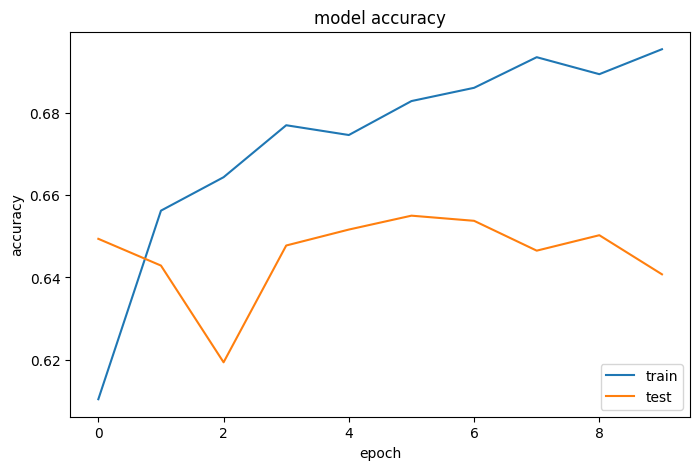

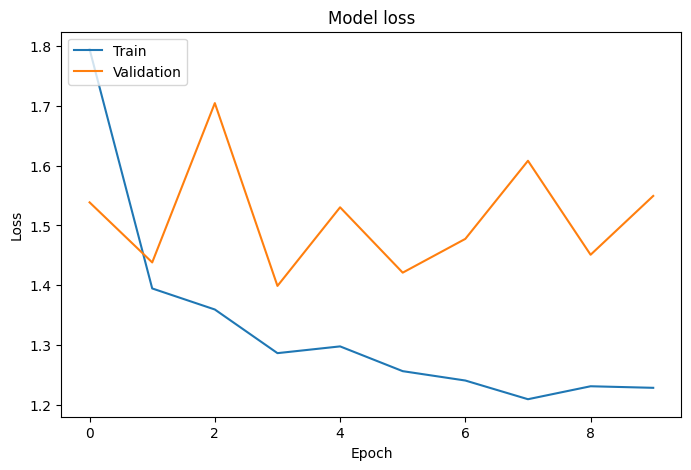

In [53]:
plot_accuracy(history_conv5)
plot_errors(history_conv5)

In [58]:
score_conv6 = linear_model2.evaluate(conv6_output, y_train, verbose=0)
print('Test accuracy of the linear model with conv6 input:', score_conv6[1])

Test accuracy of the linear model with conv6 input: 0.7761499881744385


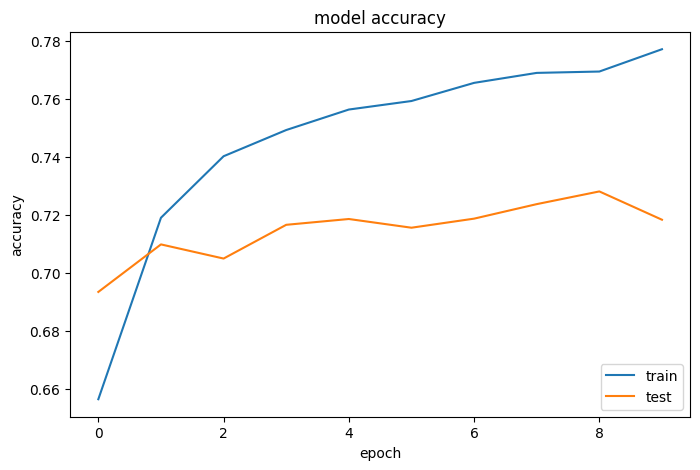

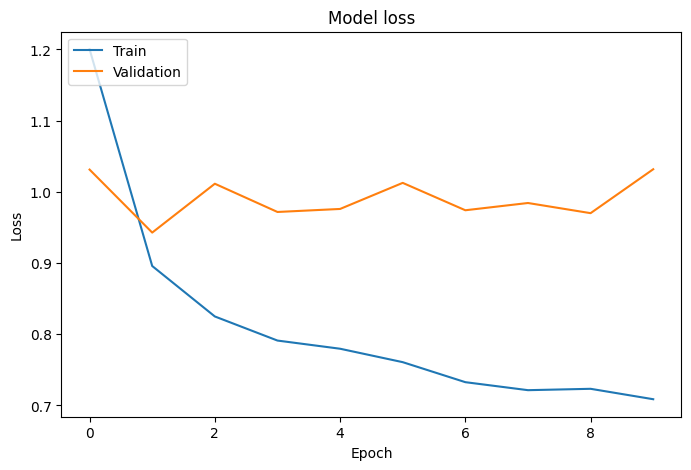

In [59]:
plot_accuracy(history_conv6)
plot_errors(history_conv6)

In [60]:
score_dense1 = linear_model3.evaluate(dense1_output, y_train, verbose=0)
print('Test accuracy of the linear model with dense input:', score_dense1[1])

Test accuracy of the linear model with dense input: 0.8347749710083008


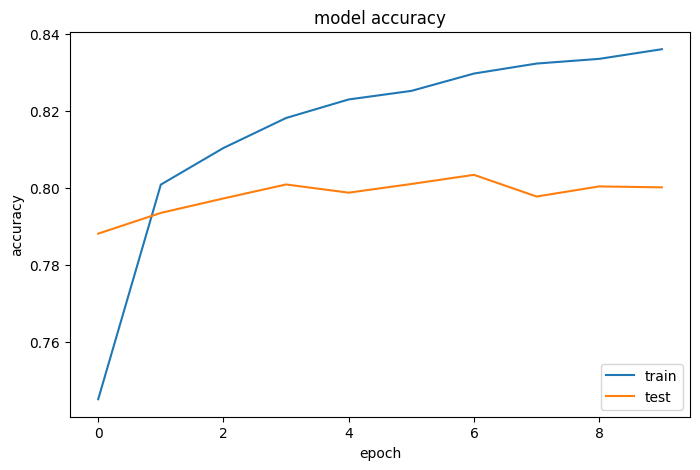

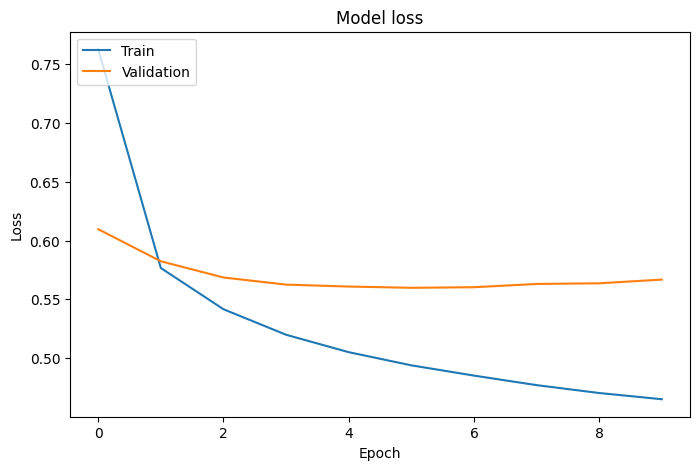

In [61]:
plot_accuracy(history_dense1)
plot_errors(history_dense1)

## Features visualization

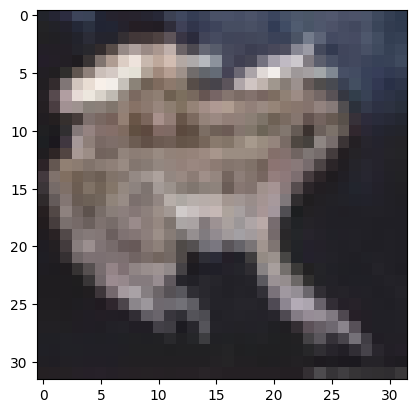

In [74]:
plt.imshow(x_train[0])
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
conv1 (1, 32, 32, 32) 


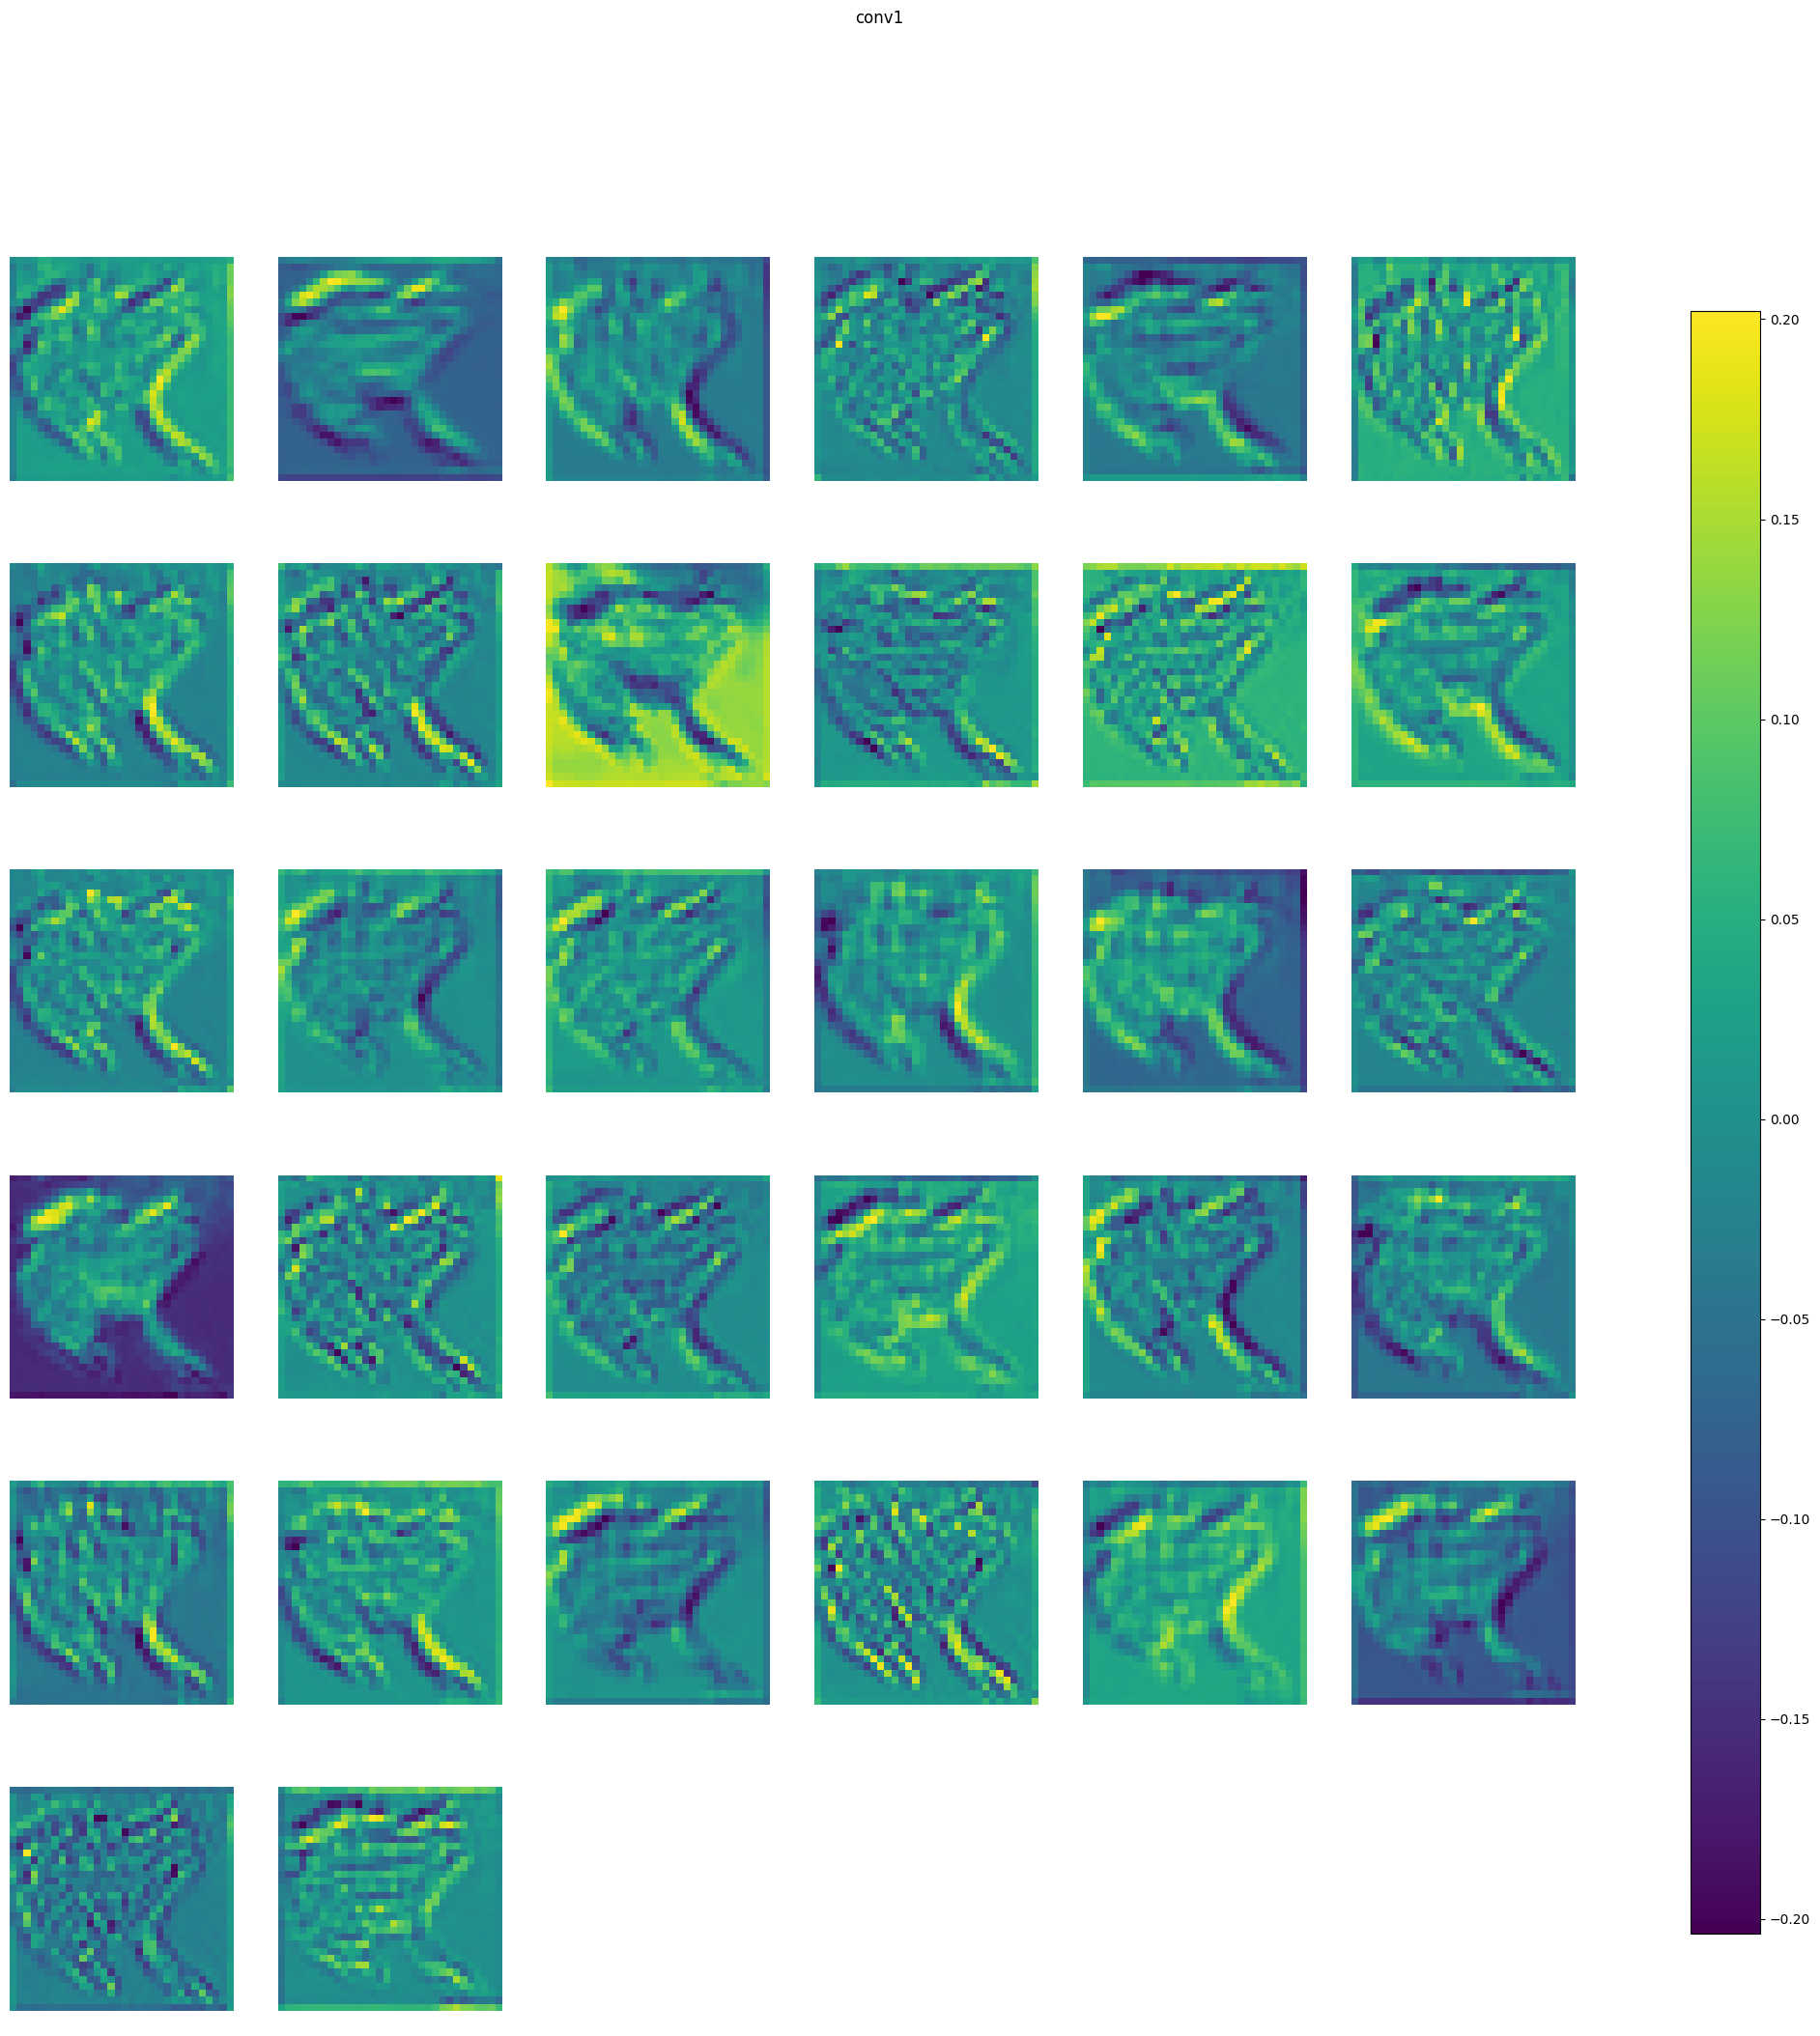

conv2 (1, 32, 32, 32) 


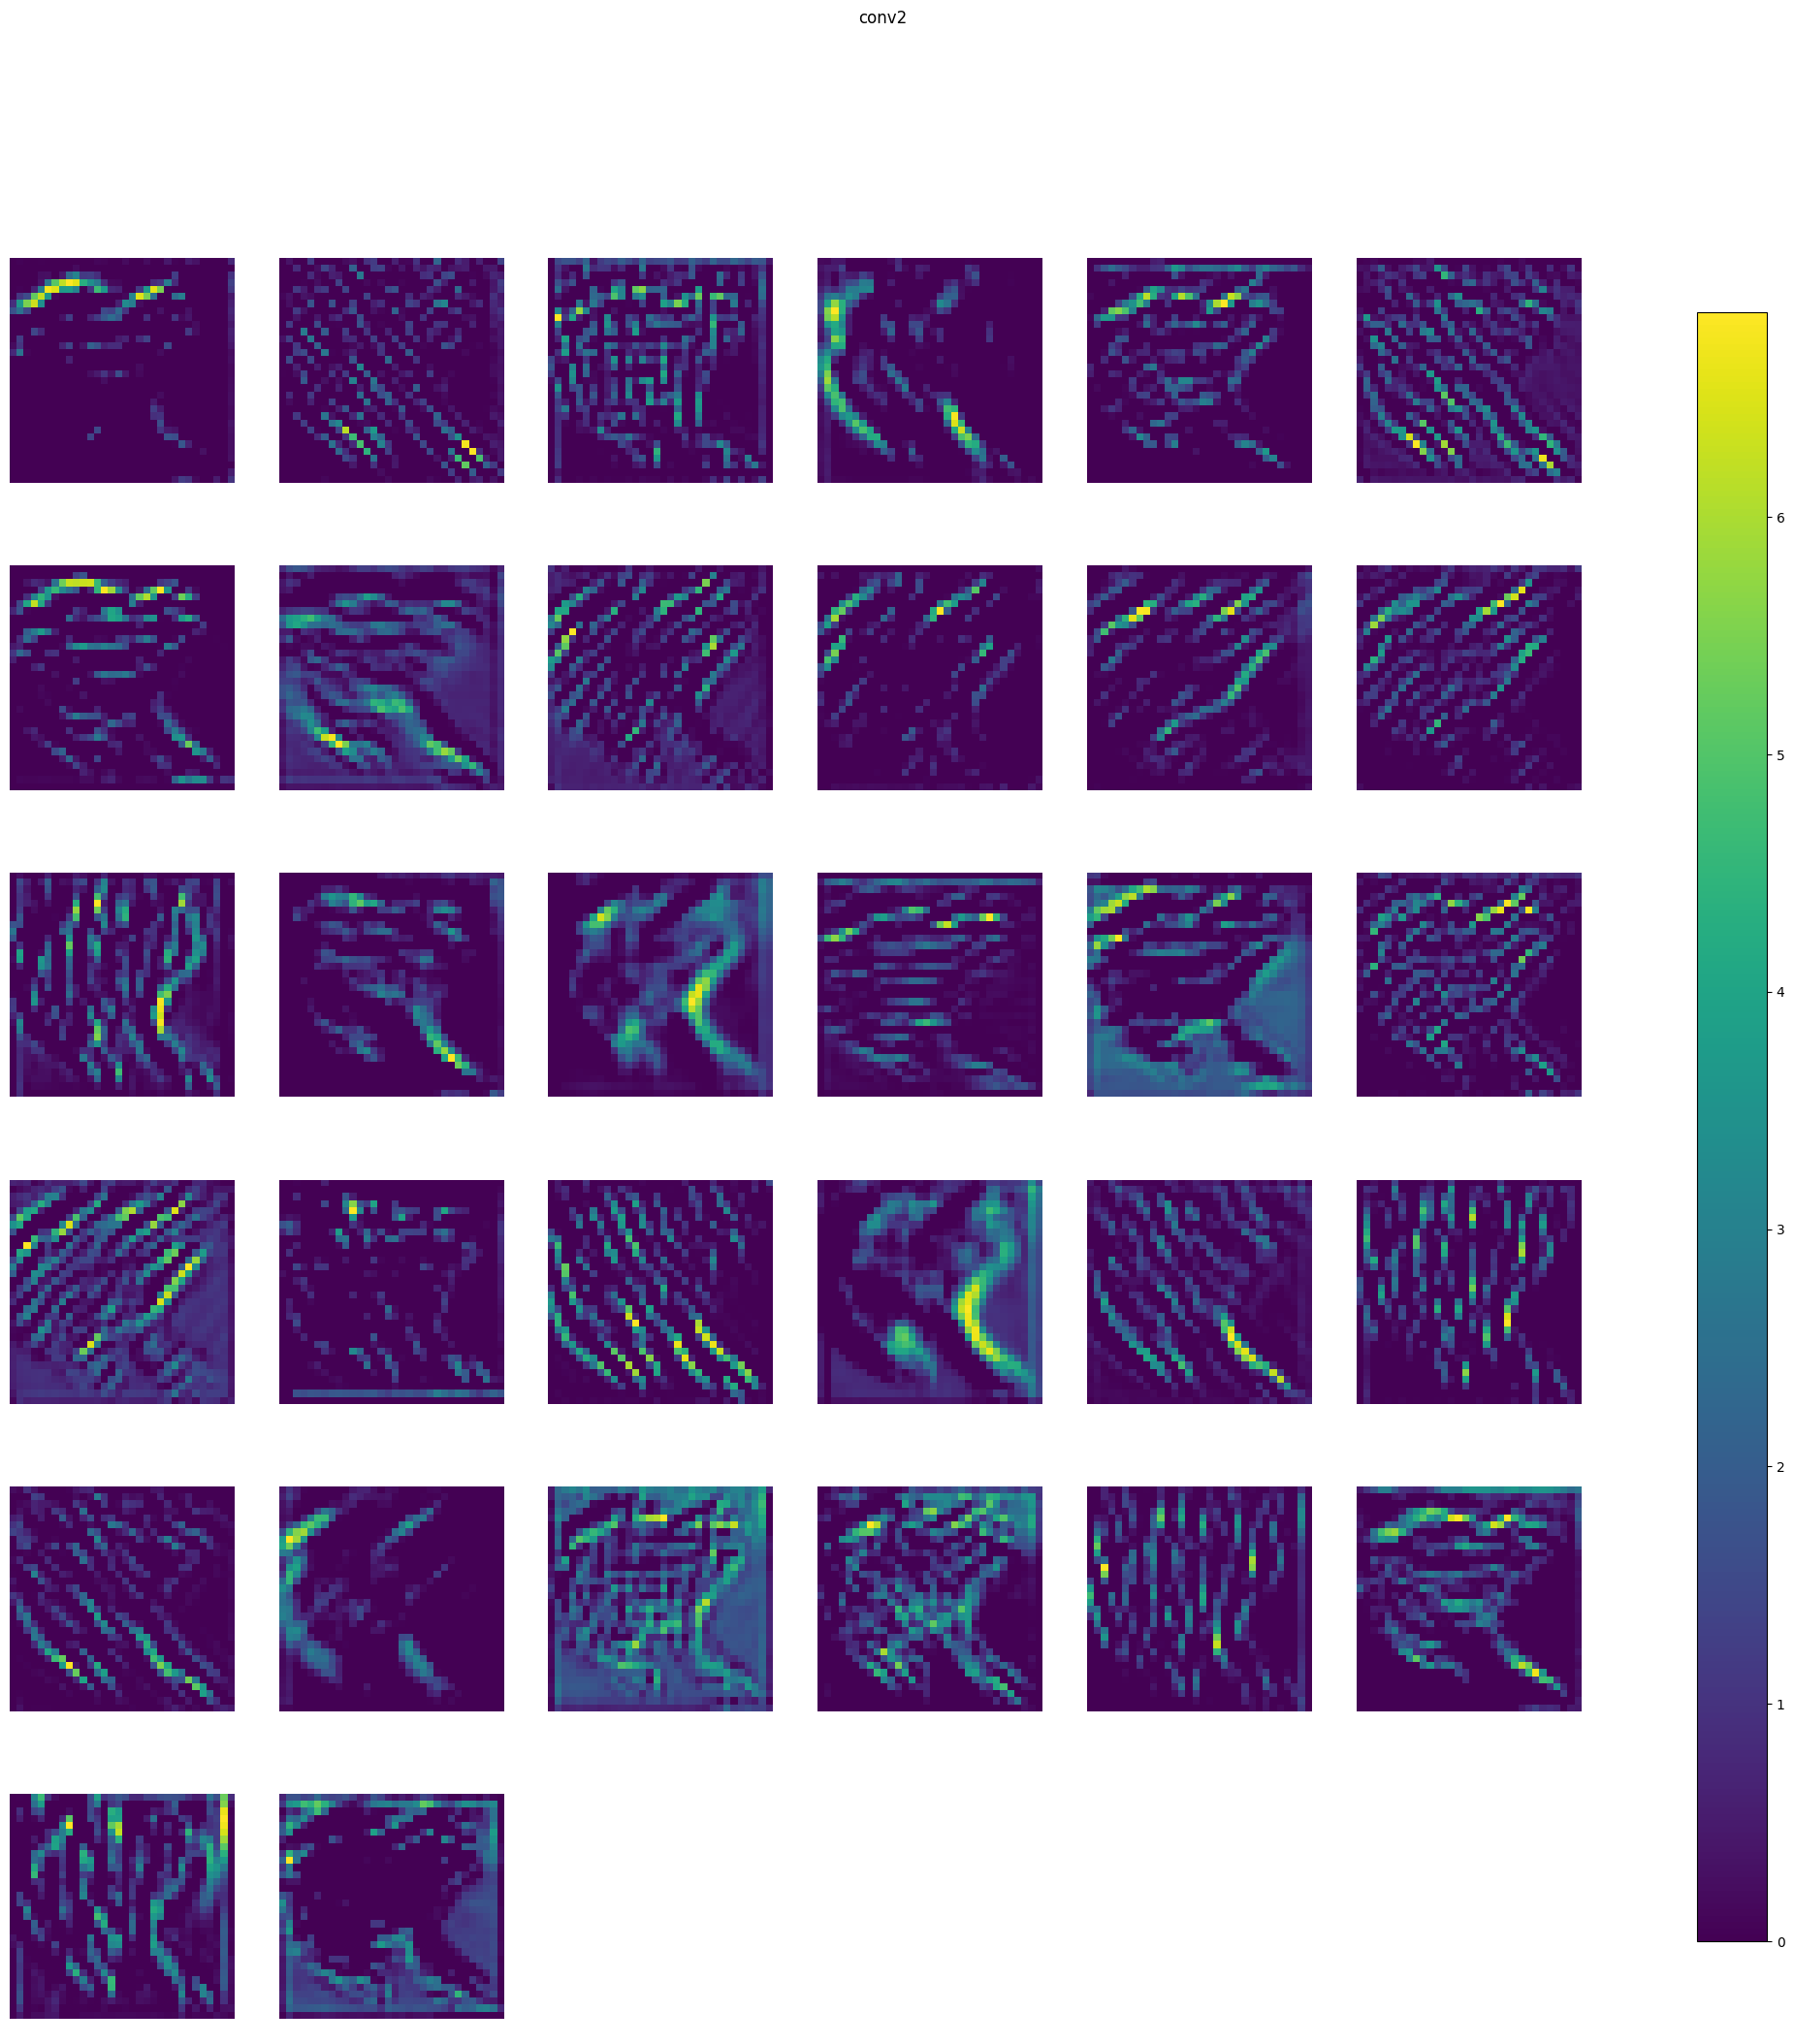

conv3 (1, 16, 16, 32) 


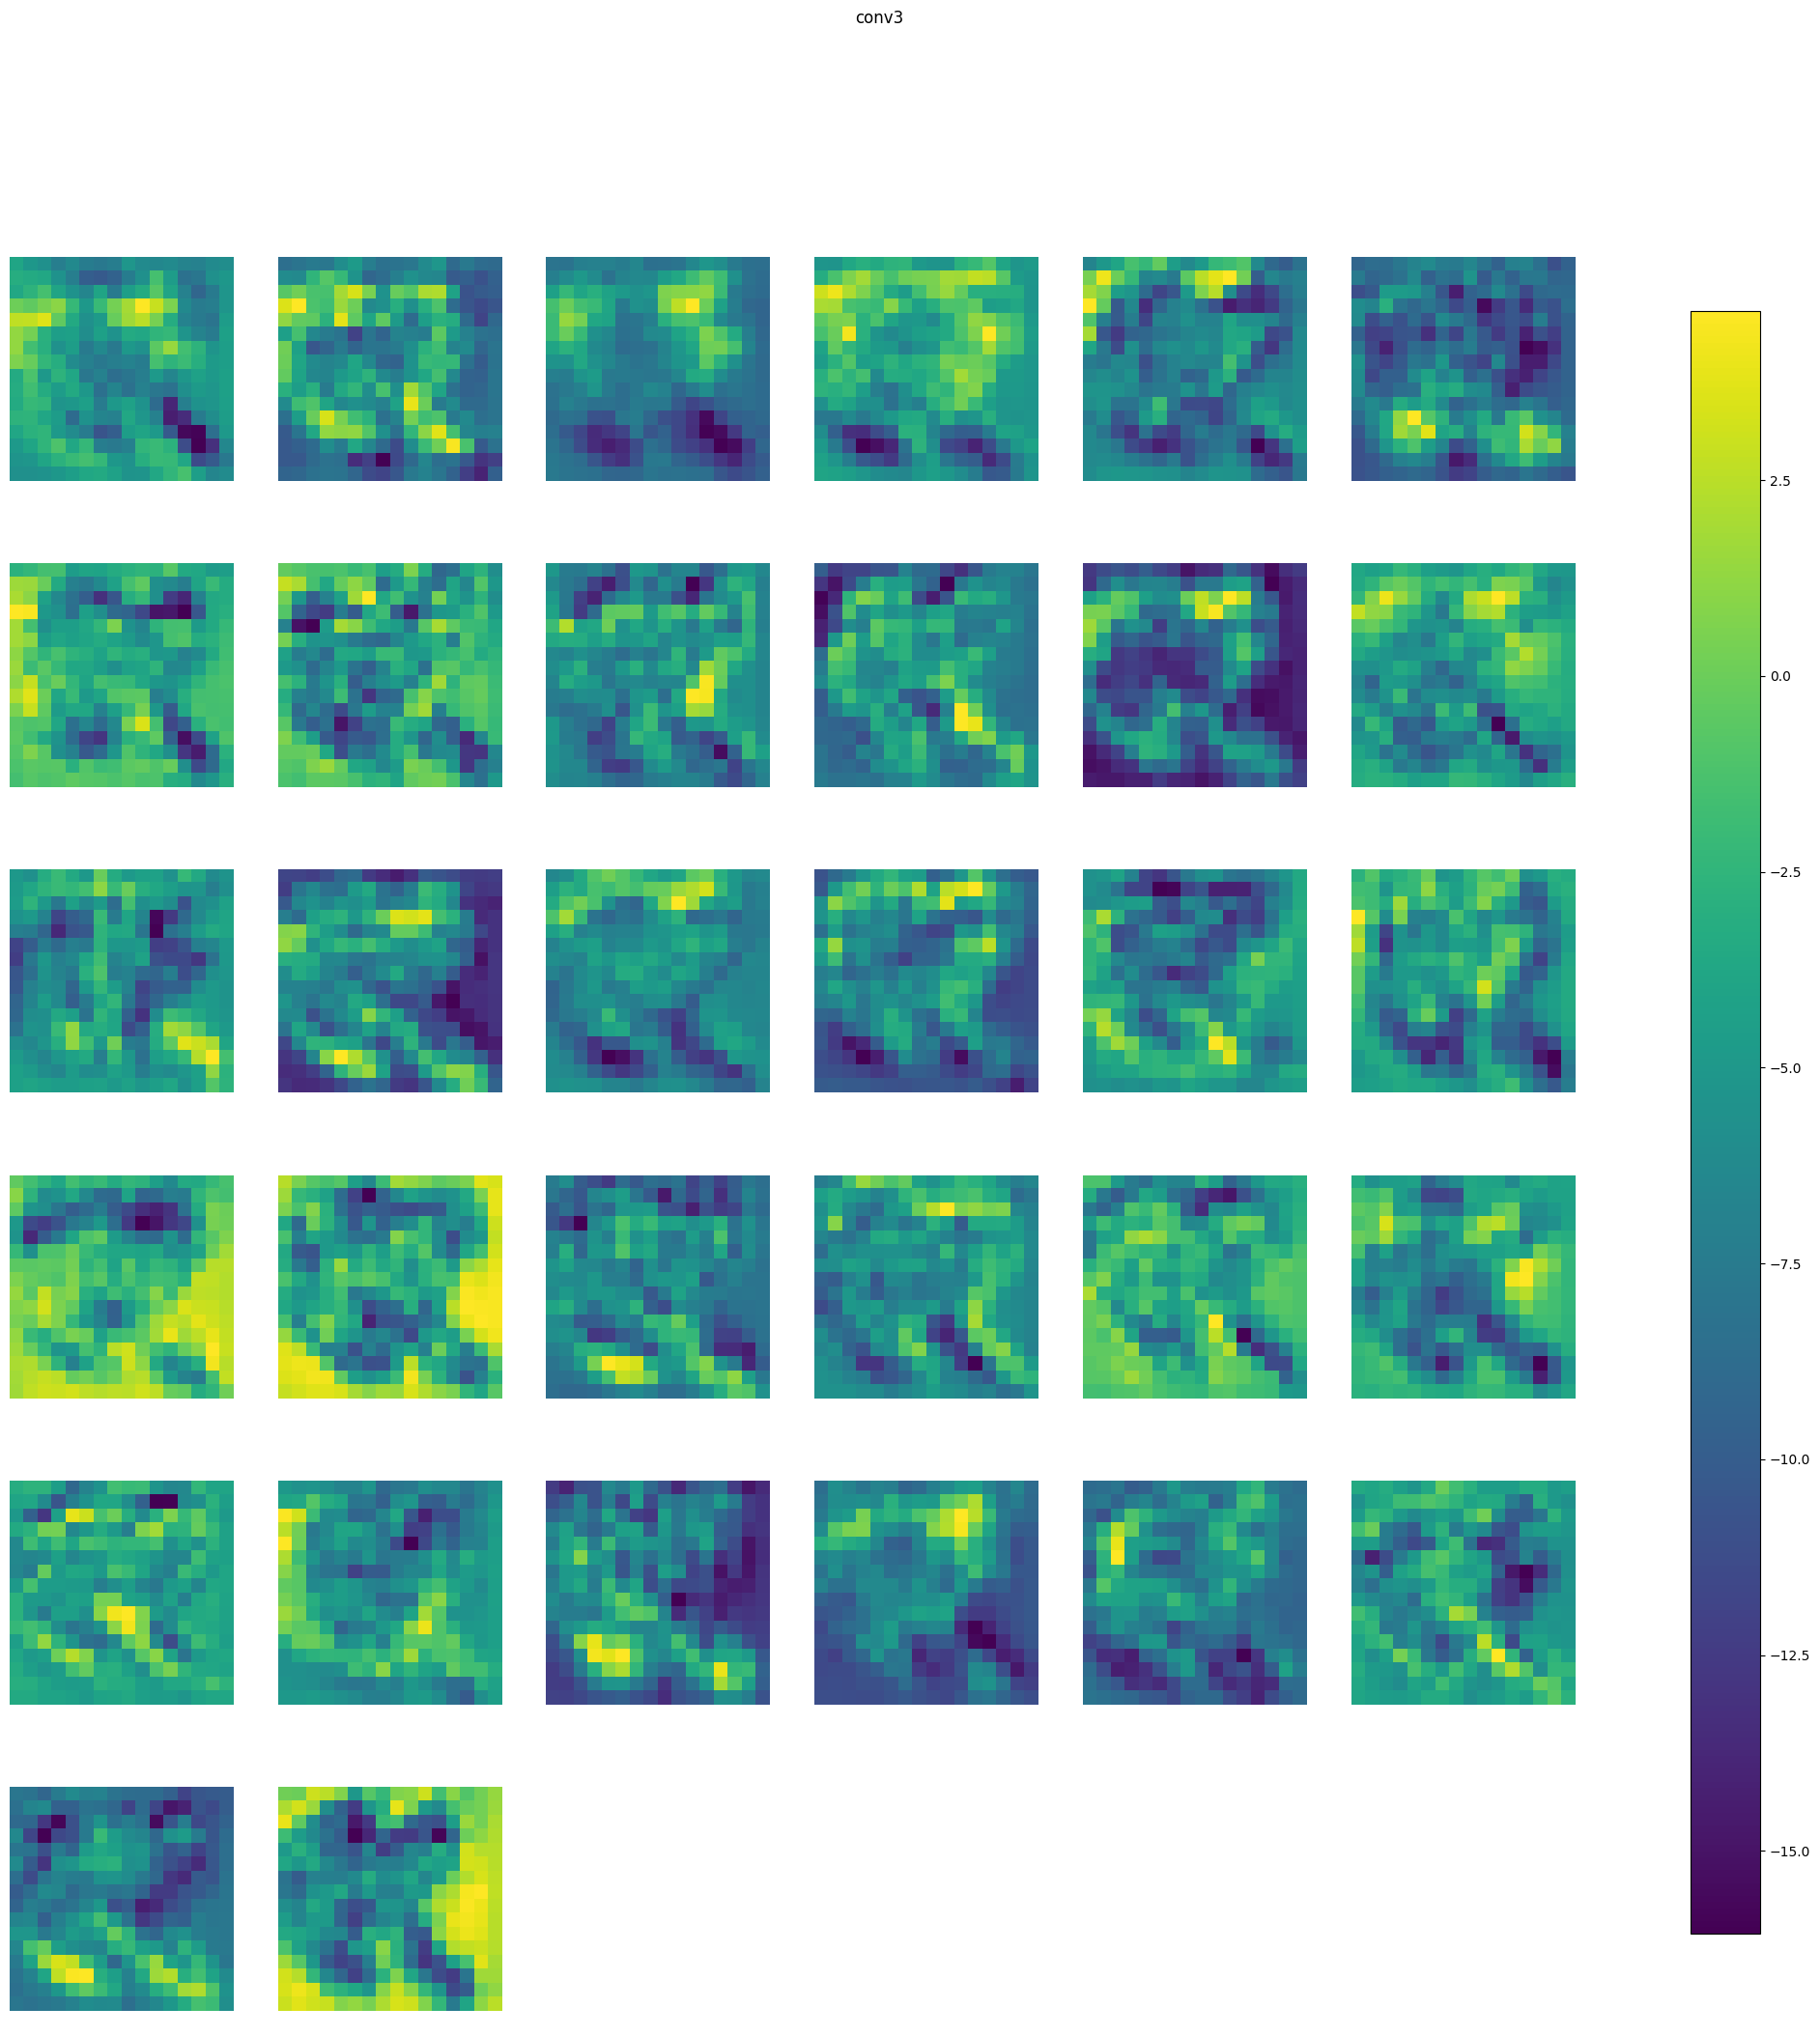

conv4 (1, 16, 16, 32) 


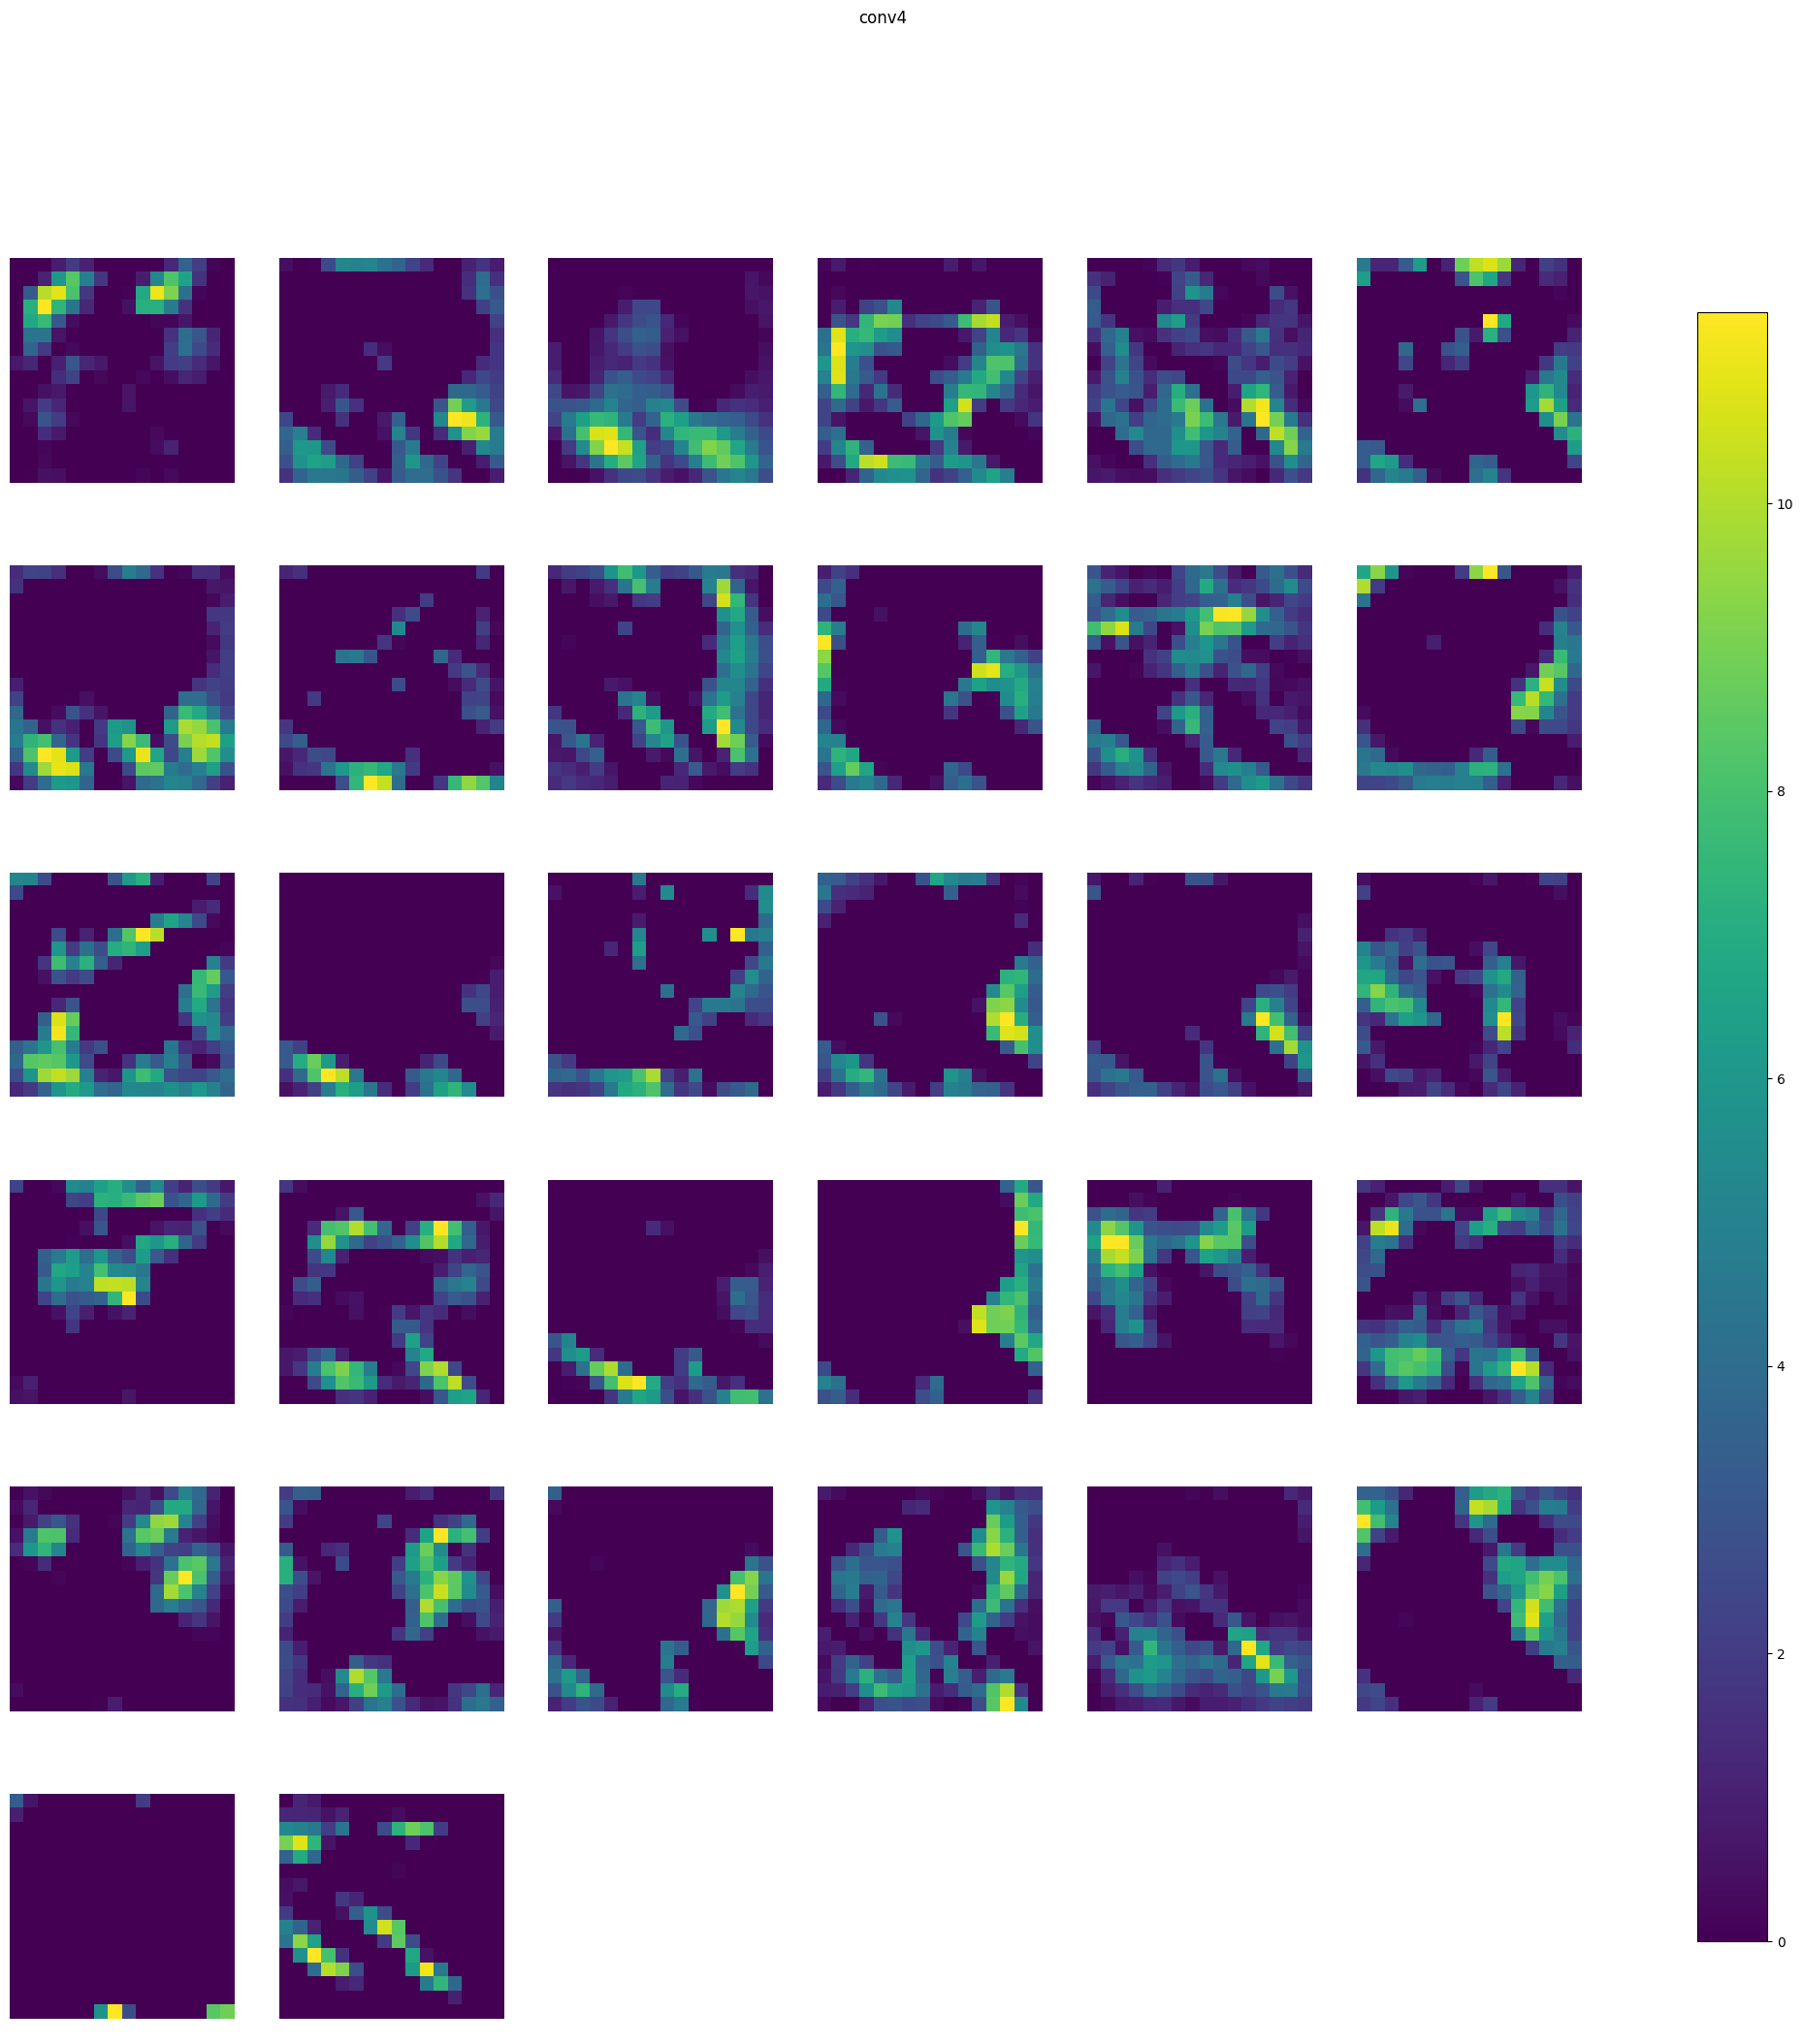

conv5 (1, 8, 8, 32) 


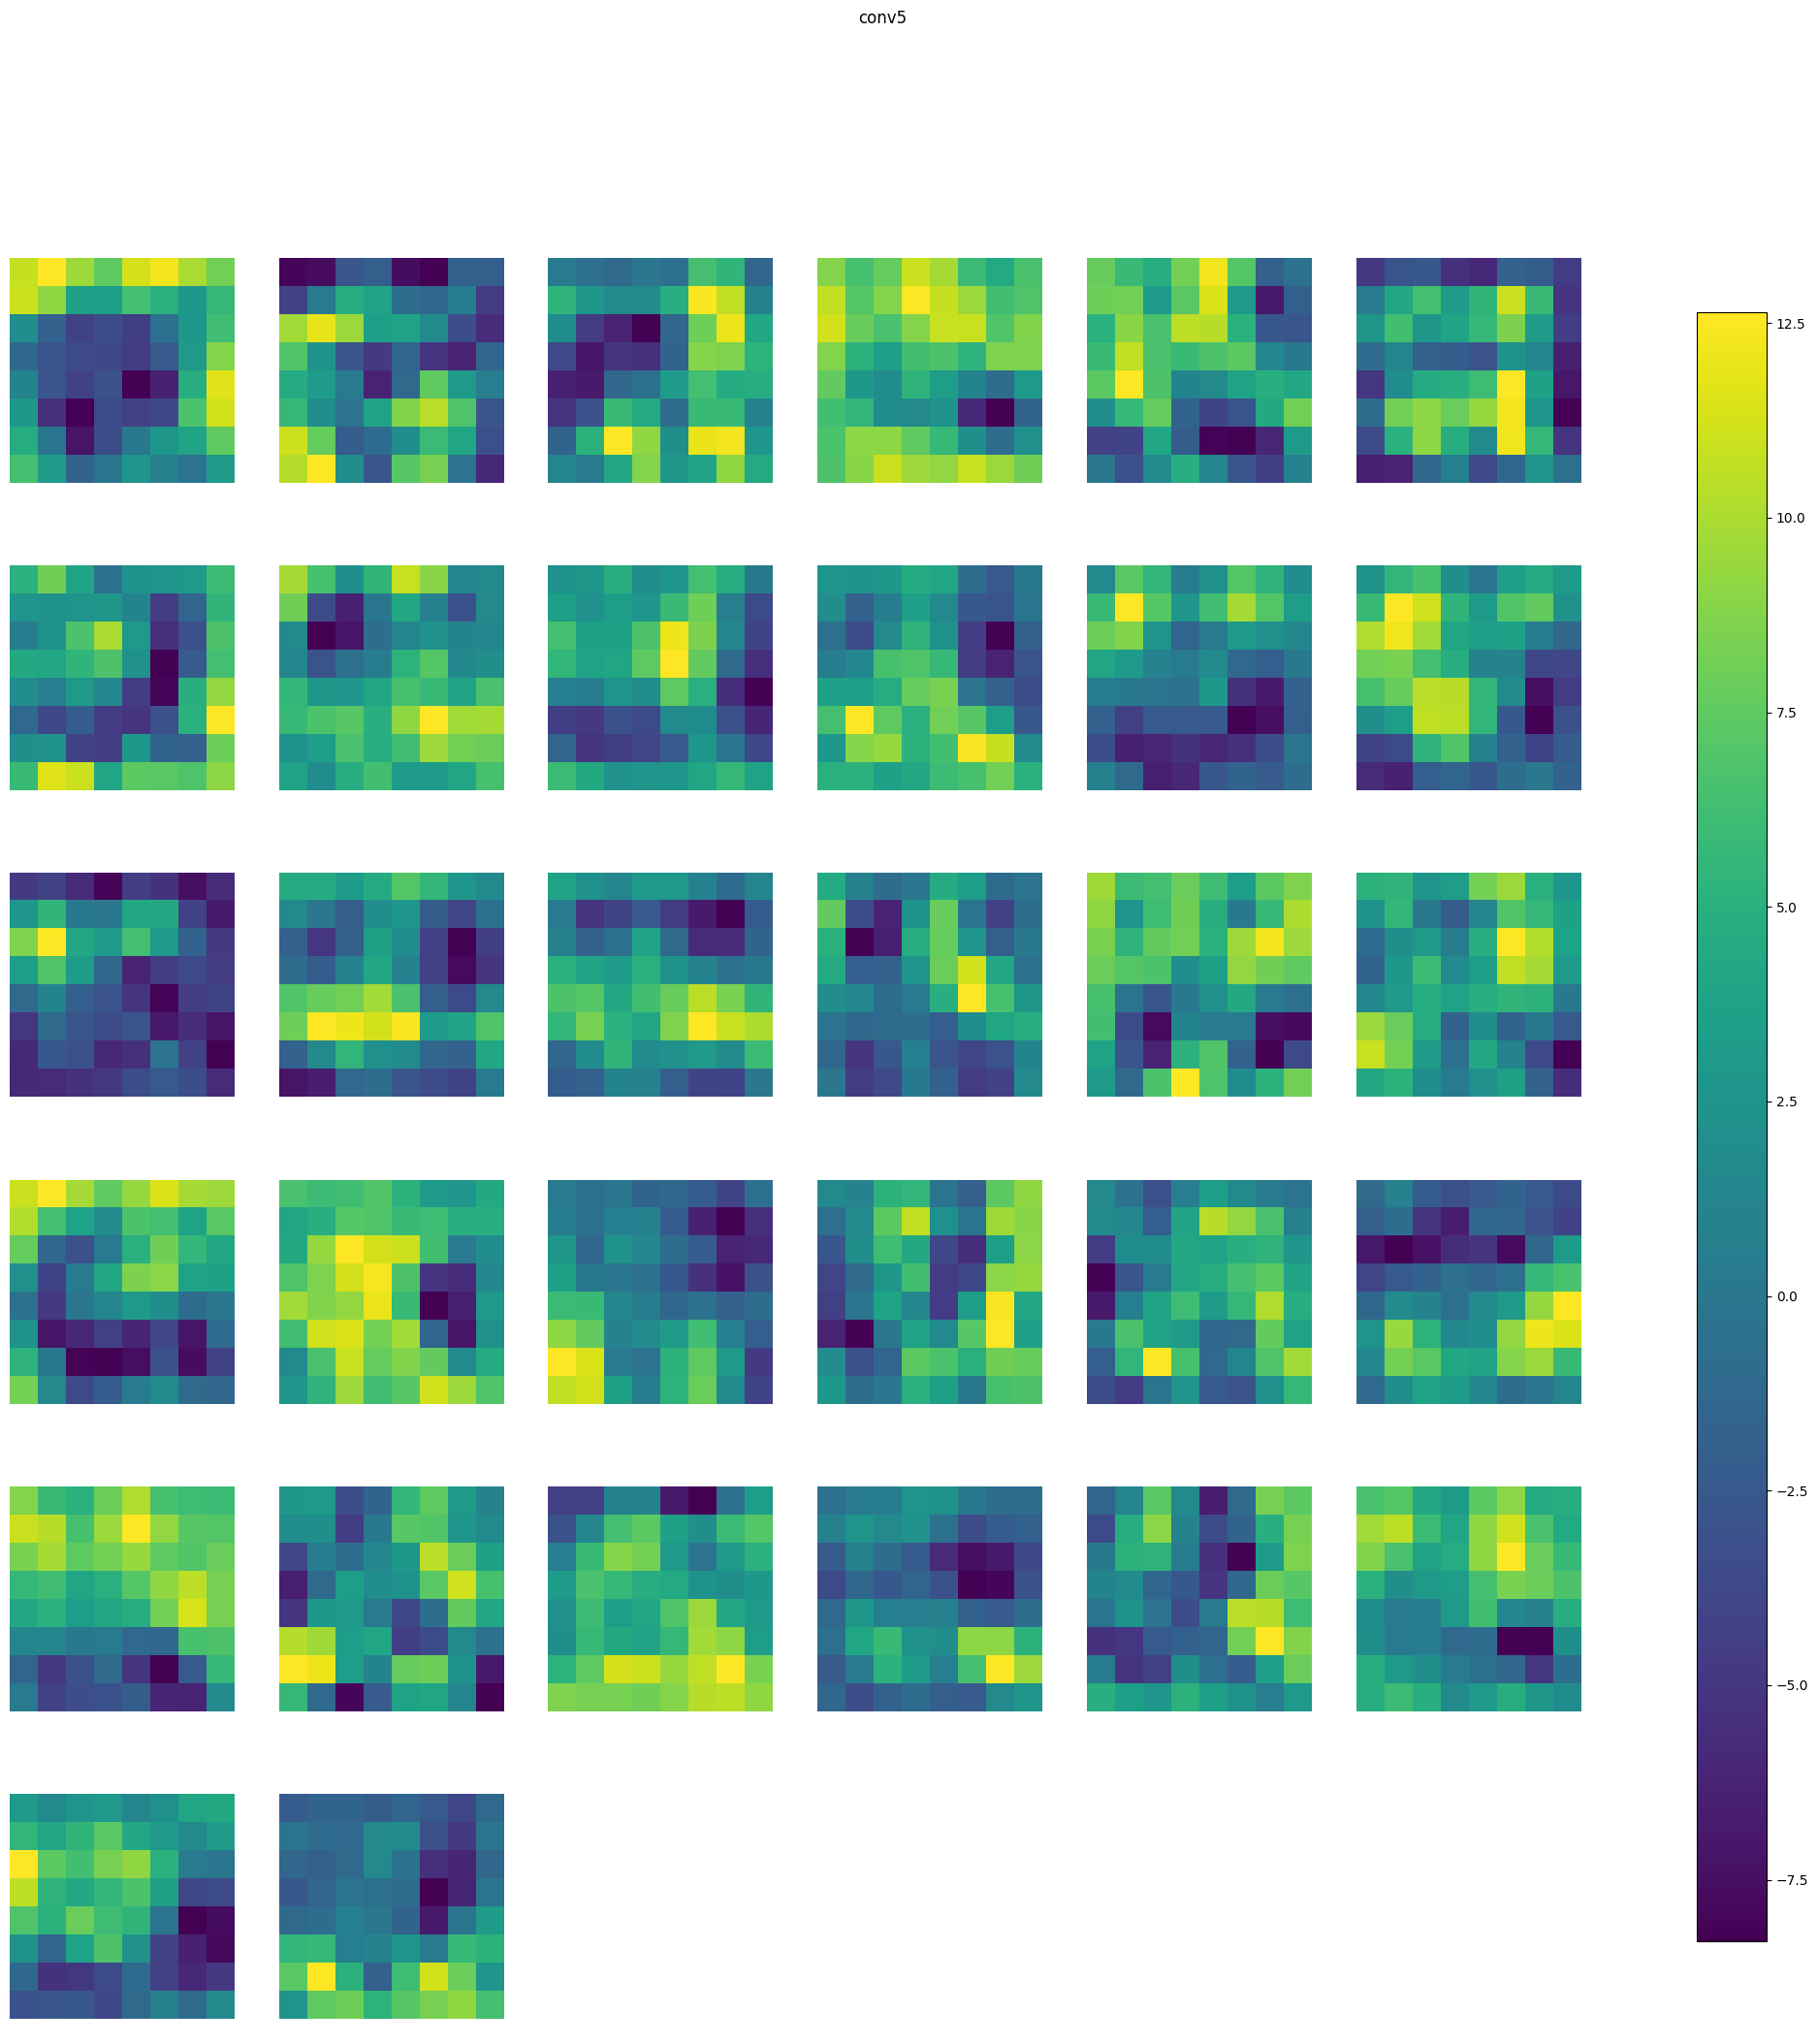

conv6 (1, 8, 8, 32) 


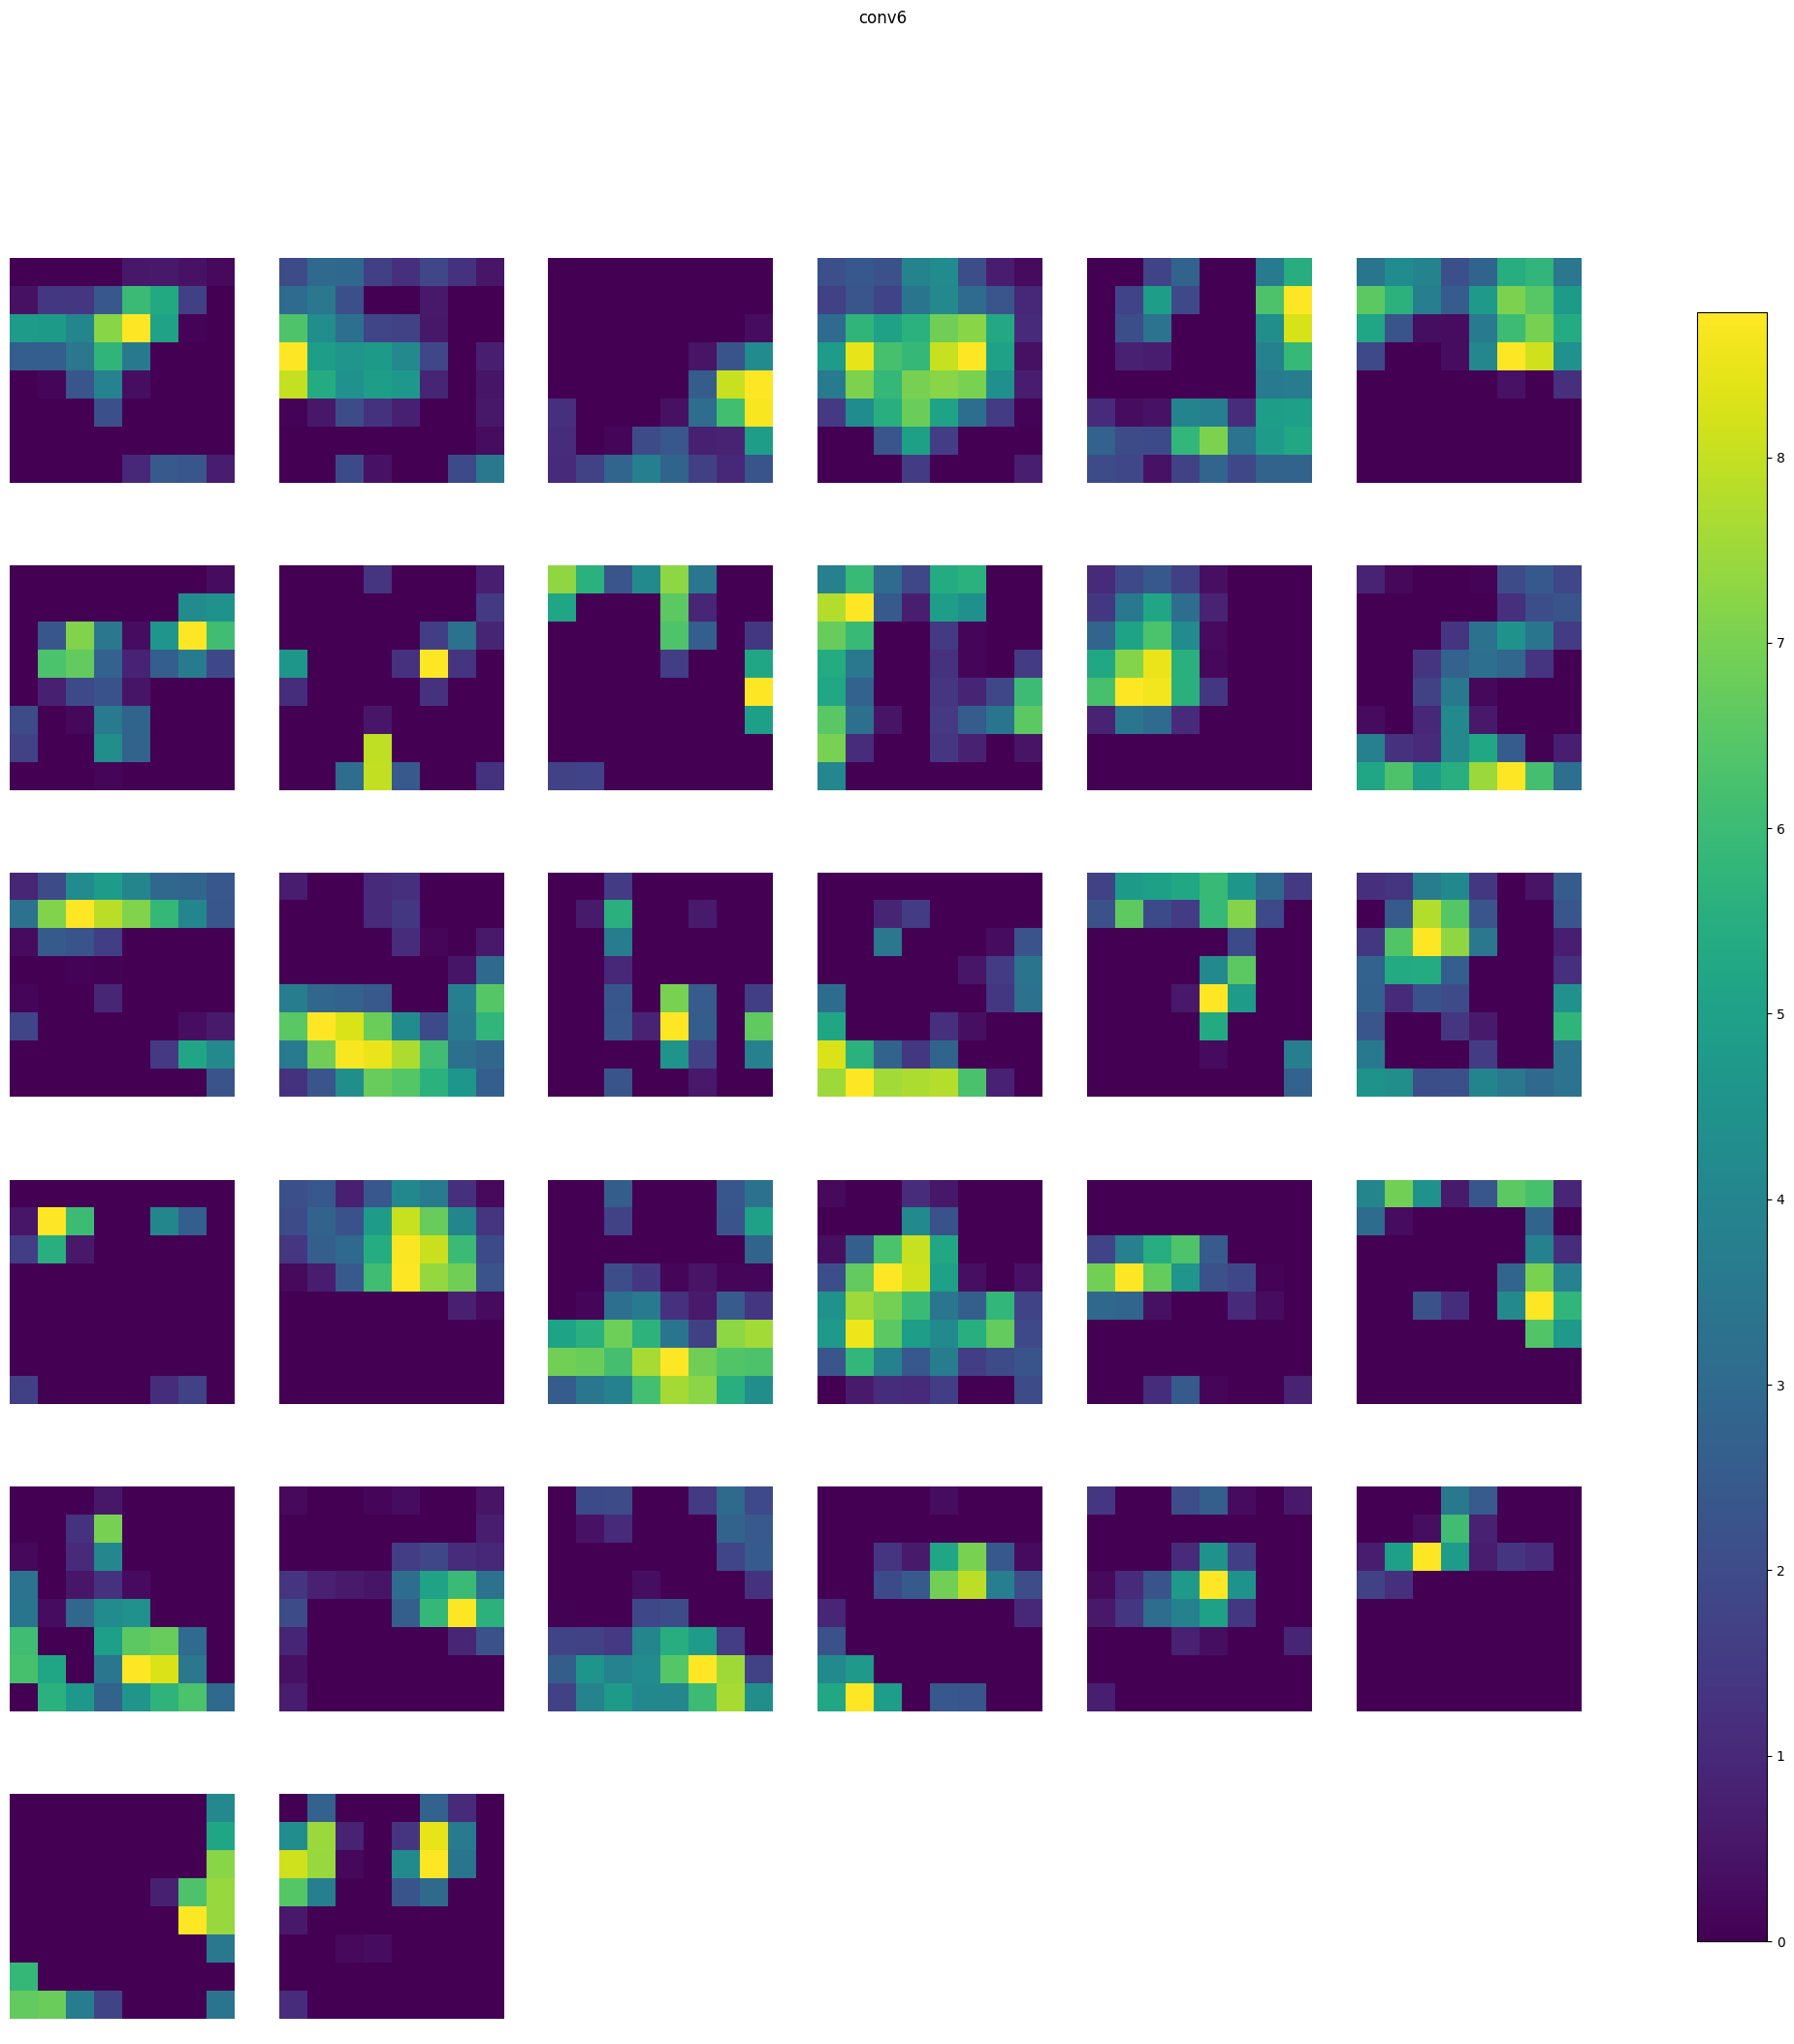

dense1 (1, 1024) 


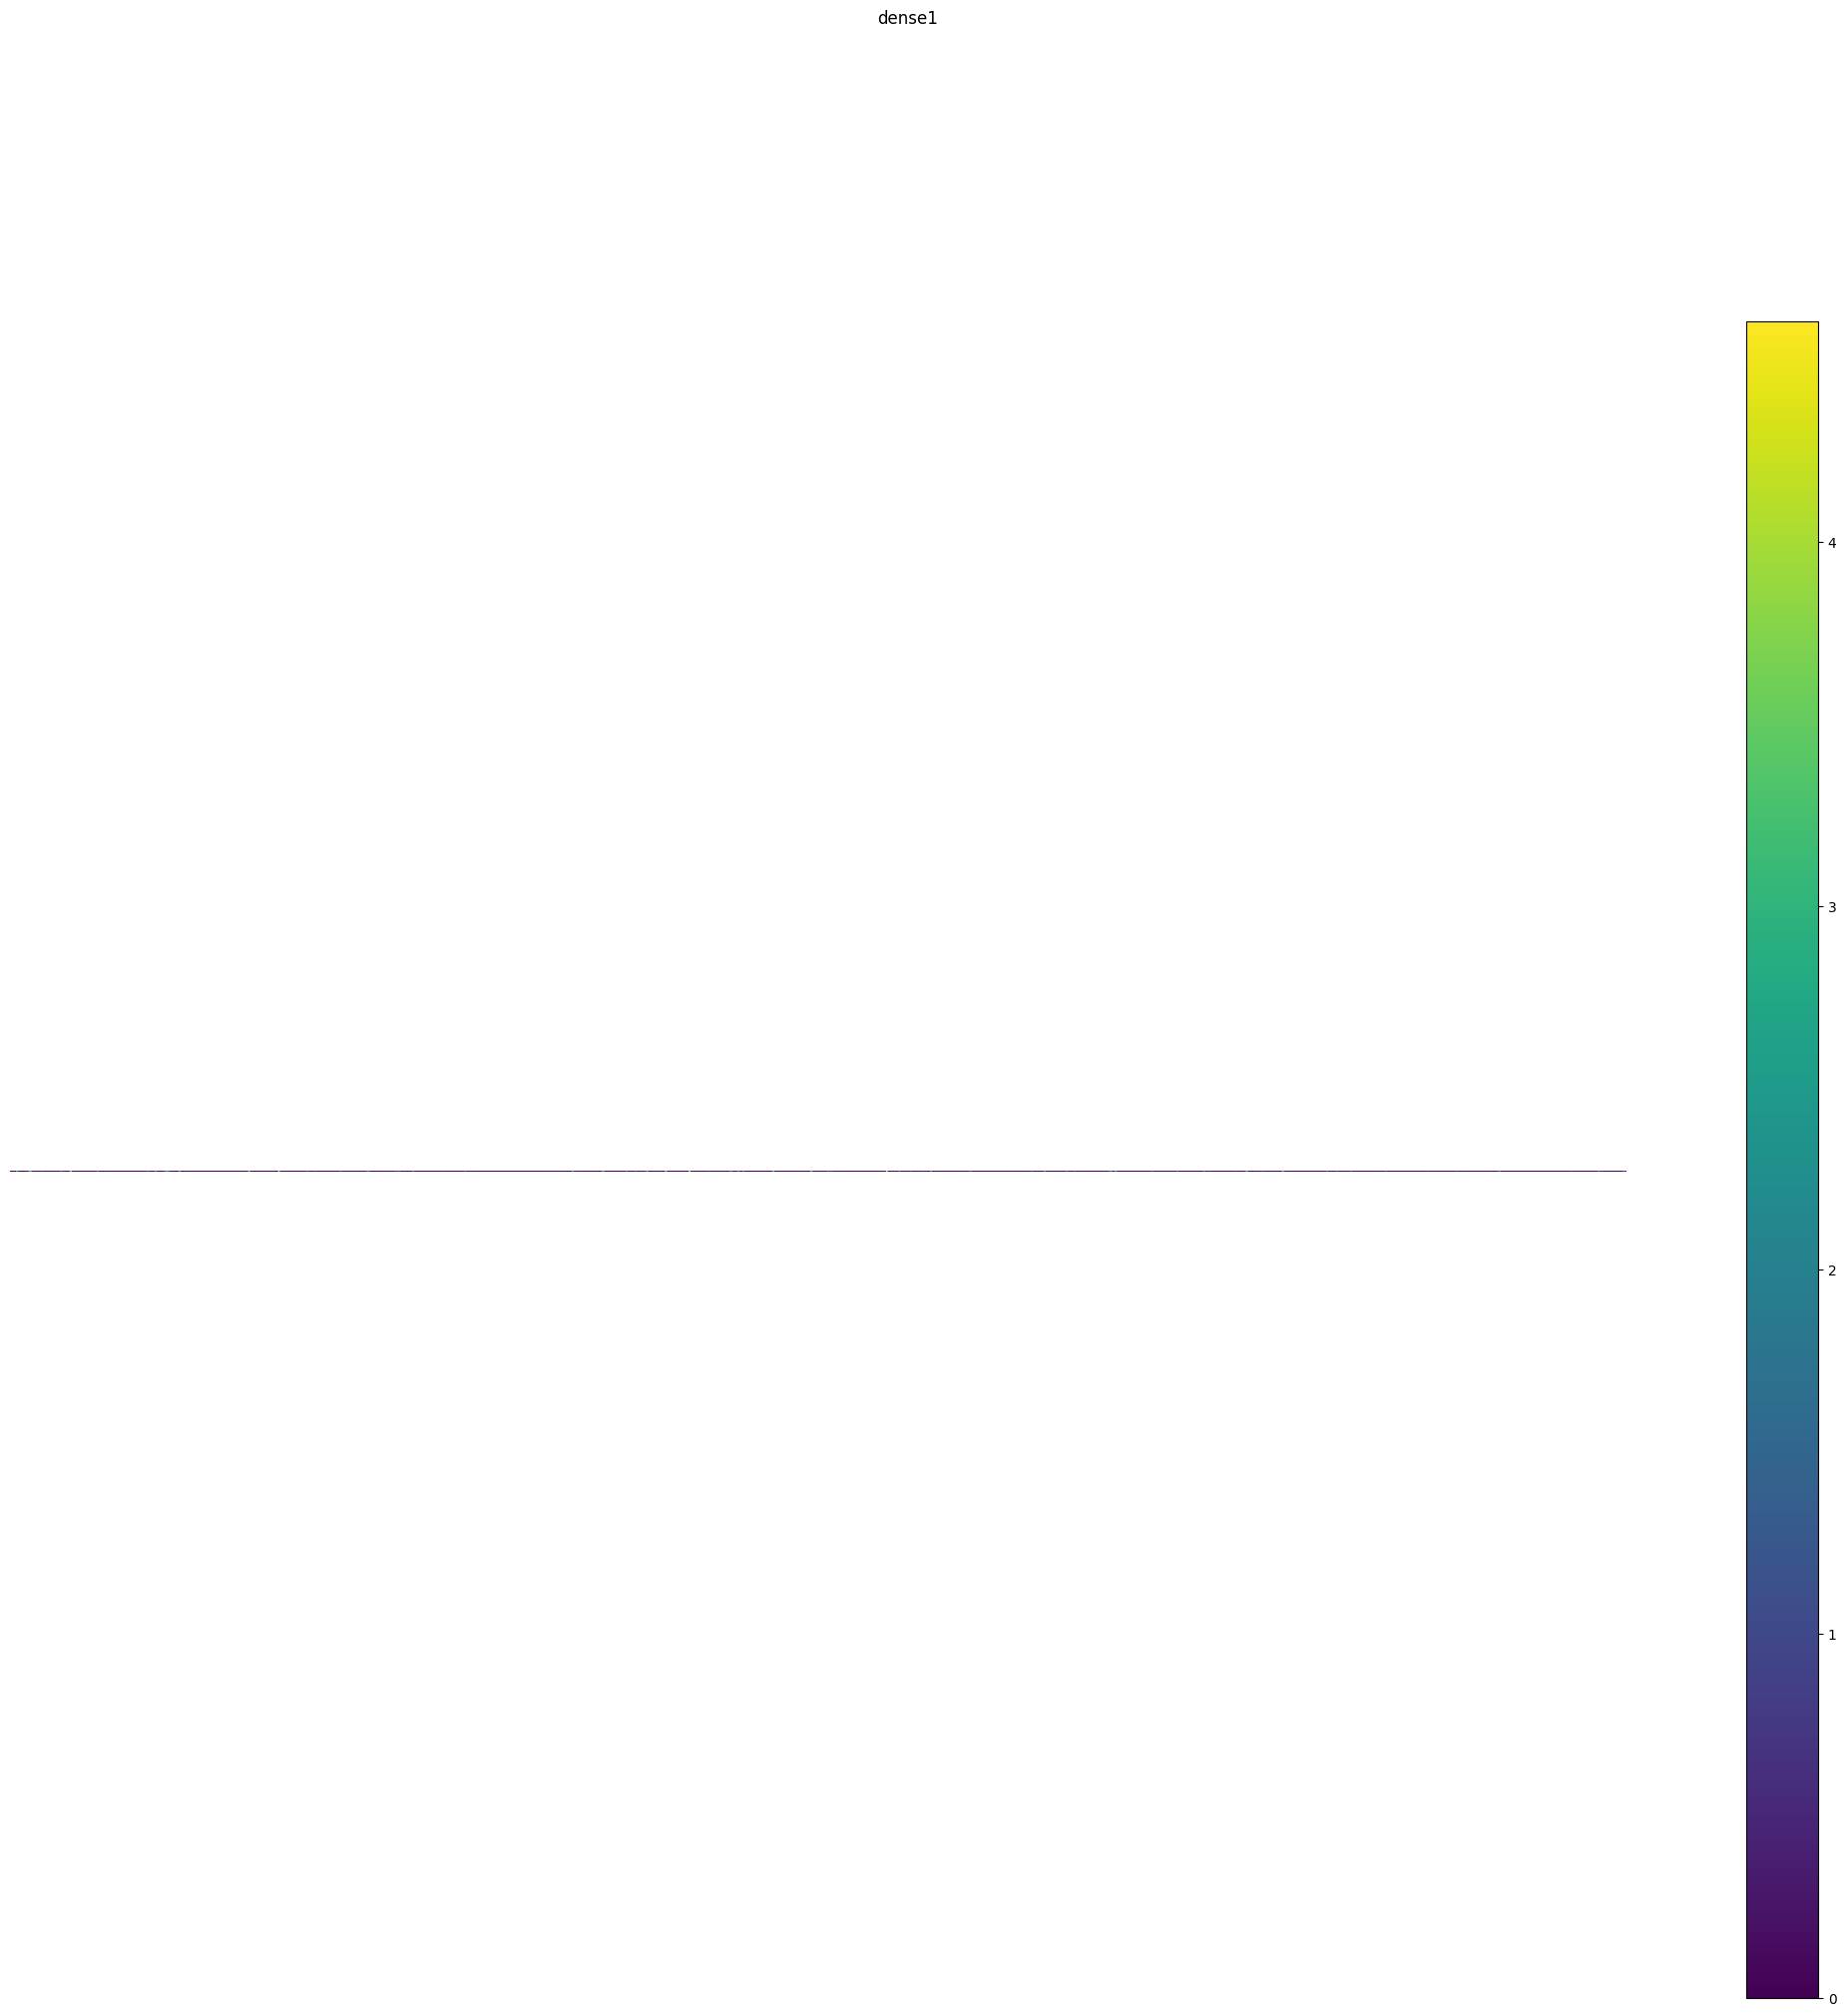

In [73]:
!pip install keract
from keract import get_activations, display_activations

layer_names=['conv1', 'conv2', 'conv3', 'conv4', 'conv5', 'conv6', 'dense1', 'dense2']
# ottieni le attivazioni del primo esempio di train
activations_cnn = get_activations(model, x_train[0:1], layer_names=layer_names)

# mostra le attivazioni
display_activations(activations_cnn, cmap="viridis")


## Robustness to Gaussian noise

In [75]:
print('Accuracy prima dell\'aggiunta di rumore: {:.2f}%'.format(test_acc * 100))

noise_factor = 0.2
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


noise_loss, noise_acc = model.evaluate(x_test_noisy, y_test, verbose=0)
print('Accuracy dopo l\'aggiunta di rumore: {:.2f}%'.format(noise_acc * 100))

Accuracy prima dell'aggiunta di rumore: 72.34%
Accuracy dopo l'aggiunta di rumore: 20.31%


In [76]:
y_pred_noisy = model.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [82]:
len(labels)

3

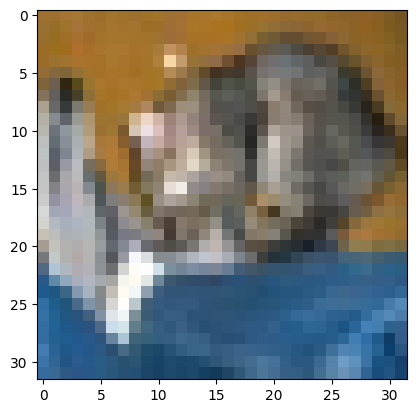

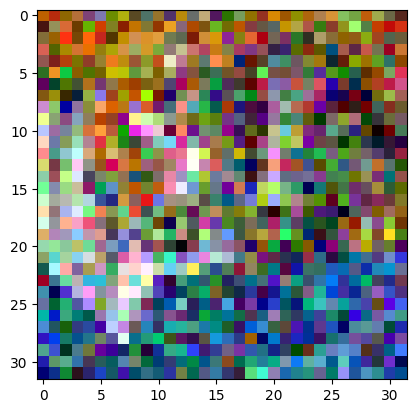

label originale cat
label dopo noise truck
label predetta dal modello originale cat


In [84]:
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test_noisy[0],cmap = 'viridis',interpolation = "nearest")
plt.show()
print("label originale", labels[np.argmax(y_test[0])])
print("label dopo noise", labels[np.argmax(y_pred_noisy[0])])
print("label predetta dal modello originale", labels[np.argmax(y_pred[0])])

## Adversarial Attack

In [110]:
# Definisci la funzione per generare gli attacchi adversariali con il Fast Gradient Sign Method
def generate_adversarial_example(input_image, input_label, epsilon):
    # Imposta i gradienti calcolati sulla variabile di input
    input_image = tf.cast(input_image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(input_label, prediction)

    # Calcola i gradienti rispetto all'input
    gradient = tape.gradient(loss, input_image)

    # Applica il segno al gradiente e normalizzalo
    signed_grad = tf.sign(gradient)
    perturbation = epsilon * signed_grad

    # Applica la perturbazione all'immagine originale
    perturbed_image = input_image + perturbation
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 1)

    return perturbed_image

In [130]:
def plot_adversarial_image(x_adv):
  fig, axs = plt.subplots(1, 2)
  axs[0].imshow(x.squeeze(), cmap='viridis')
  axs[0].set_title('Original Example')
  axs[1].imshow(x_adv.numpy().squeeze(), cmap='viridis')
  axs[1].set_title('Adversarial Example')
  plt.show()

  y_pred = model.predict(x)
  y_pred_adv = model.predict(x_adv)

  print('True Label:', labels[y_true])
  print('Predicted label:', labels[np.argmax(y_pred)])
  print('Predicted label after adversarial attack:', labels[np.argmax(y_pred_adv)])


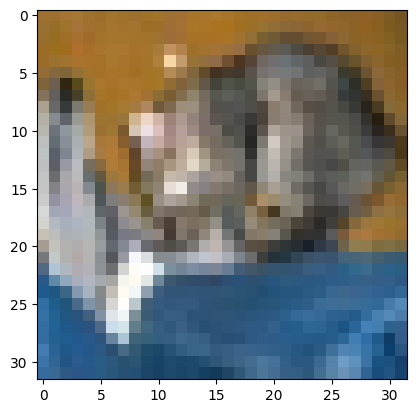

In [131]:
plt.imshow(x_test[0])
plt.show()

Epsilon:  0.005


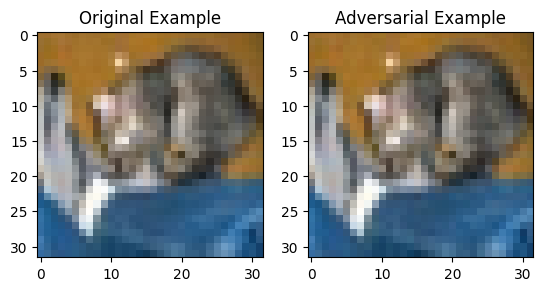

1/1 [==============================] - 0s 18ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: cat
Epsilon:  0.01


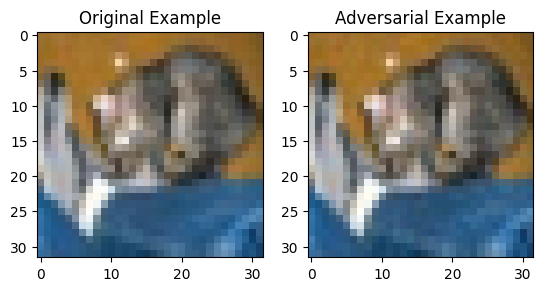

1/1 [==============================] - 0s 18ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: ship
Epsilon:  0.02


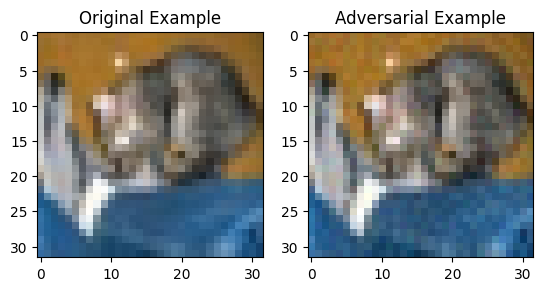

1/1 [==============================] - 0s 20ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.03


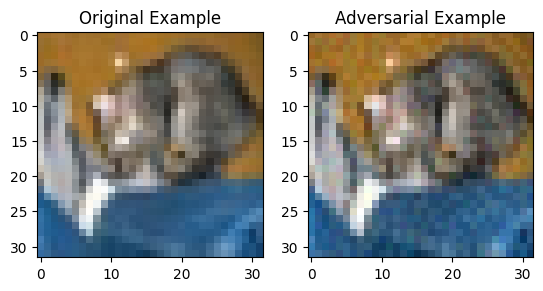

1/1 [==============================] - 0s 18ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.04


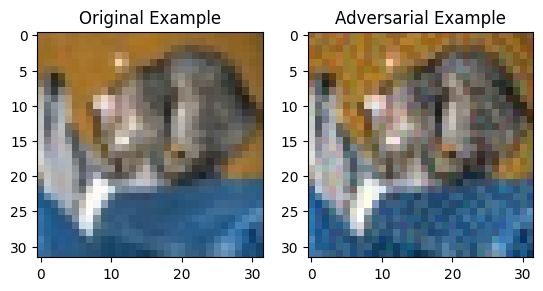

1/1 [==============================] - 0s 18ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.05


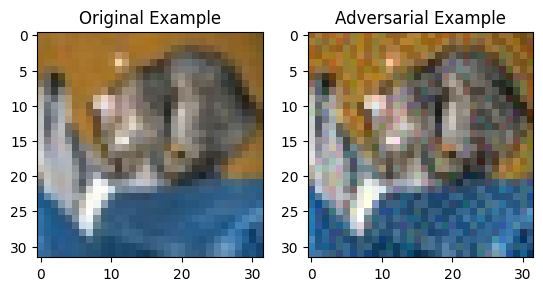

1/1 [==============================] - 0s 26ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.06


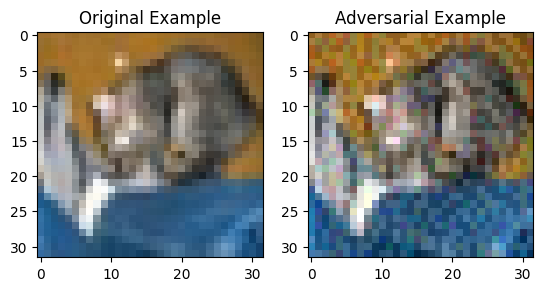

1/1 [==============================] - 0s 29ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.07


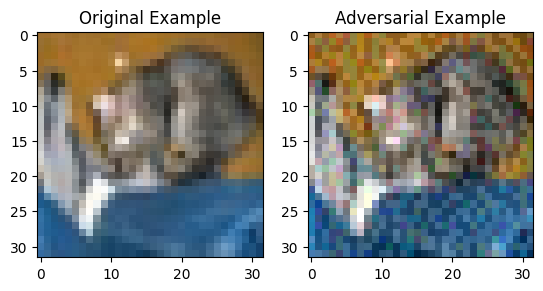

1/1 [==============================] - 0s 29ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.08


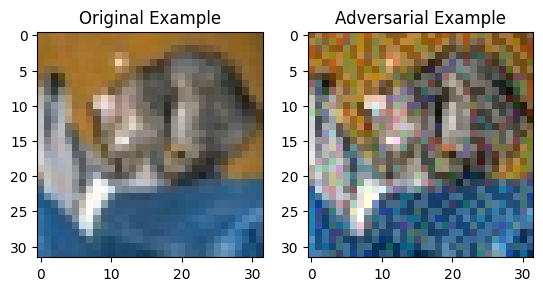

1/1 [==============================] - 0s 19ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck
Epsilon:  0.09


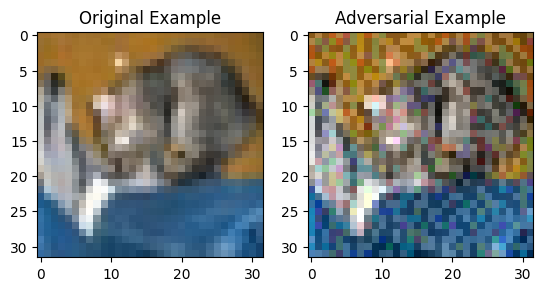

1/1 [==============================] - 0s 19ms/step
True Label: cat
Predicted label: cat
Predicted label after adversarial attack: truck


In [132]:
x = x_test[0]
x = x.reshape(1, 32, 32, 3)
y_true = np.argmax(y_test[0])
epsilons = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05,0.06,0.07,0.08,0.09]

for i in epsilons:
  x_adv = generate_adversarial_example(x, y_true, i)
  print("Epsilon: ",i)
  plot_adversarial_image(x_adv)